In [1]:
import pandas as pd
df=pd.read_csv('d:/data/soccer/player.csv')
df.head()

,id,player_name,birthday,preferred_foot,age,height,weight,potential,right_foot,left_foot,...,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,overall_rating,Label
0,1,Aaron Appindangoye,1992-02-29,right,27,183,187,71,1,0,...,65,69,69,6,11,10,8,8,67,0
1,2,Aaron Cresswell,1989-12-15,right,30,170,146,71,1,0,...,65,69,69,6,11,10,8,8,67,0
2,3,Aaron Doran,1991-05-13,right,28,170,163,66,1,0,...,65,66,69,6,11,10,8,8,62,0
3,4,Aaron Galindo,1982-05-08,right,37,183,198,65,1,0,...,62,63,66,5,10,9,7,7,61,0
4,5,Aaron Hughes,1979-11-08,right,40,183,154,65,1,0,...,62,63,66,5,10,9,7,7,61,0


In [2]:
df.shape

(10935, 45)

In [3]:
df['Label'].value_counts() #종합만족도 평균 기준 0,1

1    5705
0    5230
Name: Label, dtype: int64

In [4]:
train_cols=df.columns[4:43]
X=df[train_cols]
y=df['Label']
X.head()

,age,height,weight,potential,right_foot,left_foot,crossing,finishing,heading_accuracy,short_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,27,183,187,71,1,0,49,44,71,61,...,54,48,65,69,69,6,11,10,8,8
1,30,170,146,71,1,0,49,44,71,61,...,54,48,65,69,69,6,11,10,8,8
2,28,170,163,66,1,0,49,44,71,61,...,54,48,65,66,69,6,11,10,8,8
3,37,183,198,65,1,0,48,43,70,60,...,53,47,62,63,66,5,10,9,7,7
4,40,183,154,65,1,0,48,43,70,60,...,53,47,62,63,66,5,10,9,7,7


In [5]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Label'])
df2=pd.concat([X_samp,y_samp],axis=1)

Using TensorFlow backend.


In [6]:
df2['Label'].value_counts() 

1    5230
0    5230
Name: Label, dtype: int64

In [7]:
X=X_samp[train_cols] #독립변수
y=y_samp['Label'] #종속변수

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              stratify=y,random_state=10)

In [10]:
from sklearn.neural_network import MLPClassifier
model=Model=MLPClassifier(random_state=100)
model.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=100, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [12]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.8712954110898662
0.8690248565965584


In [14]:
mean_on_train=X_train.mean(axis=0)
std_on_train=X_train.std(axis=0)
X_train_scaled=(X_train-mean_on_train)/std_on_train
X_test_scaled=(X_test - mean_on_train)/std_on_train

In [15]:
model=MLPClassifier(random_state=100,max_iter=5000)
model.fit(X_train_scaled,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=5000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=100, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [16]:
print('학습용:{:6.2f}%'.format(model.score(X_train_scaled,y_train)*100))
print('검증용:{:6.2f}%'.format(model.score(X_test_scaled,y_test)*100))

학습용: 99.80%
검증용: 96.56%


C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


최적의 k: 25
최적의 정확도: 0.7619502868068834
500 500


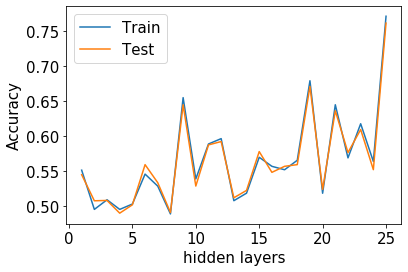

In [17]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
train_rate=[]
test_rate=[]
for i in range(100,501,100):
    for j in range(100,501,100):
        model=MLPClassifier(random_state=100,
                           hidden_layer_sizes=[i,j],max_iter=5000)
        model.fit(X_train,y_train)
        train_rate.append(model.score(X_train_scaled,y_train))
        test_rate.append(model.score(X_test_scaled,y_test))
        
plt.rcParams['font.size']=15
plt.plot(range(1,26),train_rate,label='Train')
plt.plot(range(1,26),test_rate,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('hidden layers')
plt.legend()

max_rate=max(test_rate)
idx=np.where(test_rate == max_rate)[0][0]
print('최적의 k:',idx+1)
print('최적의 정확도:',max_rate)
cnt=0
for i in range(100,501,100):
    for j in range(100,501,100):
        if cnt == idx:
            print(i,j)
        cnt+=1

In [19]:
model=MLPClassifier(random_state=[300,100],max_iter=5000)
model.fit(X_train_scaled,y_train)
print('학습용:{:6.2f}%'.format(model.score(X_train_scaled,y_train)*100))
print('검증용:{:6.2f}%'.format(model.score(X_test_scaled,y_test)*100))

ValueError: [300, 100] cannot be used to seed a numpy.random.RandomState instance

In [20]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test_scaled)
cm=confusion_matrix(y_test,pred)
df_cm=pd.DataFrame(cm,index=['평균미만','평균이상'],
                   columns=['평균미만','평균이상'])
df_cm

AttributeError: 'MLPClassifier' object has no attribute 'n_layers_'